In [19]:
import gluoncv as gcv
import mxnet as mx
# mxnet NDarray 
from mxnet import nd

# MXNet Gluon Neural network layers.
from mxnet.gluon import nn

# optional for displaying the image
import matplotlib.pyplot as plt
import numpy as np
import os
import math

# Test with color jpg of long neck deer

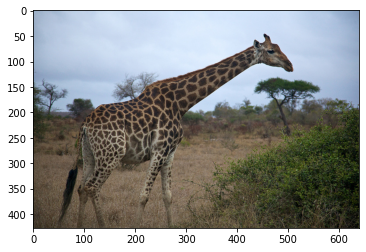

In [20]:
a_file_name = './0.jpg'
nd_array_uint8_HWC3 = mx.image.imread(a_file_name)
nd_array_f32_HWC3 = nd_array_uint8_HWC3.astype("float32")
nd_array_f3201_HWC3 = nd_array_f32_HWC3/255
plt.imshow(nd_array_f3201_HWC3.asnumpy())


# Convert to grayscale

#### Using numpy

nd_array_f3201_HWC3.shape =  (427, 640, 3)
nd_array_f3201_HWC1.shape =  (427, 640, 1)


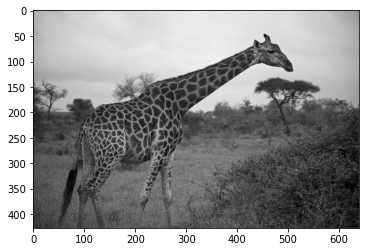

In [21]:
gray_aug = mx.image.RandomGrayAug(p=1)

# Use the RandomGrayAug Image Augment routine to convert to Grayscale
aug = mx.image.RandomGrayAug(p=1)


nd_array_f3201_HWC3 = aug(nd_array_f3201_HWC3)
print('nd_array_f3201_HWC3.shape = ', nd_array_f3201_HWC3.shape)

gray_np_array_f3201_HWC3 = nd_array_f3201_HWC3.asnumpy()
#nd_array_f3201_HWC1 = nd_array_f3201_HWC3[:,:,0]  # this makes a shape like (y,x)
nd_array_f3201_HWC1 = nd_array_f3201_HWC3.slice(begin=(0,0,0), end=(428,641,1))  # this give (y,x,1)
print('nd_array_f3201_HWC1.shape = ', nd_array_f3201_HWC1.shape)
gray_np_array_f3201_HWC1 = nd_array_f3201_HWC1.asnumpy()
plt.imshow(gray_np_array_f3201_HWC1, cmap='gray')

#### Using mxnet

nd_array_f3201_HWC3.shape =  (427, 640, 3)
nd_array_f3201_HWC1.shape =  (427, 640)


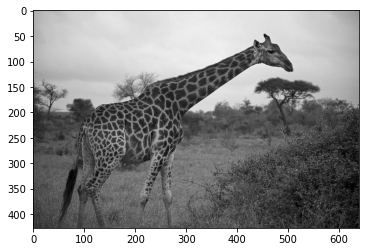

In [22]:
gray_aug = mx.image.RandomGrayAug(p=1)

# Use the RandomGrayAug Image Augment routine to convert to Grayscale
aug = mx.image.RandomGrayAug(p=1)


nd_array_f3201_HWC3 = aug(nd_array_f3201_HWC3)
# This just sets all three channels to same value.
print('nd_array_f3201_HWC3.shape = ', nd_array_f3201_HWC3.shape)

nd_array_f3201_HWC1 = nd_array_f3201_HWC3[:,:,0] # can pick any channel
print('nd_array_f3201_HWC1.shape = ', nd_array_f3201_HWC1.shape)
plt.imshow(nd_array_f3201_HWC1.asnumpy(), cmap='gray')

# Rotate

## routine for a generic rotate matrix

In [23]:
def build_rot_matrix(angle):
    # calculate terms
    a = math.cos(x)
    b = -math.sin(x)
    c = math.sin(x)
    d = math.cos(x)

    # build np array
    np_array = np.array([
        [a,b],
        [c,d]
    ])
    
    # build mx.nd array
    nd_array = mx.nd.array(np_array)
    
    return nd_array

###  rotate 0 matrix

In [24]:
x=0

rotate_0 = build_rot_matrix(x)
print('rotate by 0 nd array is ', rotate_0)

rotate by 0 nd array is  
[[ 1. -0.]
 [ 0.  1.]]
<NDArray 2x2 @cpu(0)>


### rotate 90 matrix

In [25]:
x=0.5*math.pi

rotate_90 = build_rot_matrix(x)
print('rotate by 90 nd array is ', rotate_90)

rotate by 90 nd array is  
[[ 6.123234e-17 -1.000000e+00]
 [ 1.000000e+00  6.123234e-17]]
<NDArray 2x2 @cpu(0)>


### rotate by 180/-180 matrix

In [26]:
x=math.pi

rotate_180 = build_rot_matrix(x)
print('rotate by 180 nd array is ', rotate_180)

rotate by 180 nd array is  
[[-1.0000000e+00 -1.2246469e-16]
 [ 1.2246469e-16 -1.0000000e+00]]
<NDArray 2x2 @cpu(0)>


## Generic Rotate Routine

In [27]:
def my_print(verbose=False, *args):
    if (verbose):
        print(args)

In [82]:
def my_rotate(input_image_batch, rotate_matrix, verbose=False):
    # NDArrayIter(data, label=None, batch_size=1, shuffle=False, 
    #            last_batch_handle='pad', data_name='data', 
    #            label_name='softmax_label')
    #
    # Ignore the label parameter.
    dataiter = mx.io.NDArrayIter(input_image_batch, batch_size=1, shuffle=False, last_batch_handle='discard')
    for batch in dataiter:

        my_print(verbose, 'loop entry - a single batch - a single image in batch.data[0] from what is in in_data')
        
        
        # Does this copy or get an alias to the input image?
        a_img_batch = batch.data[0]
        my_print(verbose, 'a_img_batch = ', a_img_batch)
        my_print(verbose, 'a_img_batch.shape = ', a_img_batch.shape)

        #
        # Remember the dims so we can reshare the flattened array back to rectangular
        orig_dims = a_img_batch[0].shape
        
        
        a_img_indexes = mx.nd.contrib.index_array(a_img_batch, axes=(1, 2))
        my_print(verbose, 'a_img_indexes  ', a_img_indexes)
        my_print(verbose, 'a_img_indexes.shape ', a_img_indexes.shape)



        # Try to assign input data to output data based upon indicies
        #
        # Need to reshape so that rows=size of image sans batch
        # 2x2-> 4,2
        # 3x3-> 9,2
        #
        num_rows = a_img_batch[0].size
        my_print(True,'num_rows = ', num_rows)
        orig_indexes = mx.nd.reshape(a_img_indexes, shape=(num_rows,2))
        my_print(verbose, 'orig_indexes ', orig_indexes)
        orig_indexes = orig_indexes.astype("float32")

        # do the rotate
        new_indexes = nd.dot(orig_indexes, rotate_matrix) 
        my_print(verbose, 'new_indexes = ', new_indexes)
        new_indexes = new_indexes.astype('int64')
        my_print(verbose, 'new_indexes = ', new_indexes)
        #
        # shift to lower right quadrant. shift so that index axes is 0,0 in top left
        #
        # find the min row value
        min_row = new_indexes.min(axis=0)[0]
        my_print(verbose, 'min_row = ', min_row)
        adj_row = nd.abs(min_row).asscalar()
        my_print(verbose, 'adj_row = ', adj_row)
        
        # find the min col value
        min_col = new_indexes.min(axis=0)[1]
        my_print(verbose, 'min_col = ', min_col)
        adj_col = nd.abs(min_col).asscalar()
        my_print(verbose, 'adj_col = ', adj_col)
 
        # adjust based upon min row/col
        # with rotate 90 for 3x3 its [0,2]
        new_indexes = new_indexes + nd.array(nd.array([adj_row, adj_col])).astype('int64')
        my_print(verbose, 'new_indexes after shift to positive', new_indexes)

        #
        # The output image needs to be resized to match new dimensions.
        #
        
        #
        # Determine the max dim in array
        # 
        # find the min row value
        max_row = new_indexes.max(axis=0)[0].asscalar() + 1
        my_print(verbose, 'max_row = ', max_row)
        
        # find the min col value
        max_col = new_indexes.max(axis=0)[1].asscalar() + 1
        my_print(verbose, 'max_col = ', max_col)

        # This only works for square images rotated in 90 degree increments
        #output_image_batch = nd.zeros(input_image_batch.size).reshape(input_image_batch.shape)
        # Use new max col and max row
        output_image_batch = nd.zeros(input_image_batch.size).reshape([1, max_row, max_col])
        print('output_image_batch.shape = ', output_image_batch.shape)

        
        output_image = output_image_batch[0]
        
        my_print(verbose, 'output_image_batch ', output_image_batch)
        my_print(verbose, 'output_image_batch.shape ', output_image_batch.shape)
        my_print(verbose, 'output_image_batch[0] ', output_image_batch[0])
        print('works 0?')
        print('works 1?')
        print('a_img_batch[0].shape = ', a_img_batch[0].shape)
        print('new_indexes[:,0].max = ', new_indexes[:,0].max)
        print('new_indexes[:,1].max = ', new_indexes[:,1].max)
        my_print(verbose, 'a_img_batch[0][new_indexes[:,0],new_indexes[:,1]] ', a_img_batch[0][new_indexes[:,0],new_indexes[:,1]])
        #print(a_img_batch[0][new_indexes[:,0],0])
        return 0
     
    
   #     output_image = a_img_batch[0][new_indexes[:,0],new_indexes[:,1]]
   #     my_print(verbose, 'output_image ', output_image)
        # output_image is flatened, need to resize to rectangular
        #
        #
        # FAILURE #1 
        # (new_dims, new_dims) = square_root(num_rows) only works when square
        # 
        # new_dims = float(num_rows)**0.5
        # new_dims = int(new_dims)
        # output_image = output_image.reshape(new_dims, new_dims)
        #
        # FAILURE #2
        # 
        # If the image is rotated so that H,W becomes W,H and W is greater than W, this will
        # fail since the indexes are out of range.
        #
        # output_image = output_image.reshape(orig_dims)
        
        
        # Hack
        #max_dim = max(max_col, max_row)
                
   #     output_image = output_image.reshape( max_row, max_col)    
   #     print('works 2?')
        
   #     my_print(verbose, 'output_image ', output_image)
   #     output_image_batch = nd.expand_dims(output_image, axis=0)
   #     my_print(verbose, 'output_image_batch ', output_image_batch)
   #     print('works 3?')
        
   #     return output_image_batch
        #return 0 # stub

#### Massage image into batch format

nd_array_batch.shape =  (1, 427, 640)


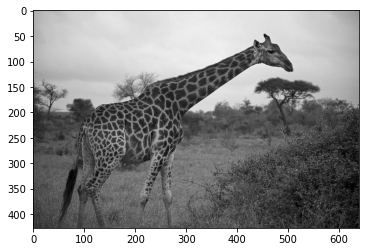

In [83]:
# starting image
#plt.imshow(nd_array_f3201_HWC1.asnumpy(), cmap='gray')
nd_array_f3201_HWC1.shape
nd_array_batch = nd.expand_dims(nd_array_f3201_HWC1, axis=0)
print('nd_array_batch.shape = ', nd_array_batch.shape)
# "plot" the "batch" version
plt.imshow(nd_array_batch[0].asnumpy(), cmap='gray')


# Test 0

In [84]:
out_img_batch = my_rotate(nd_array_batch, rotate_0)
#plt.imshow(out_img_batch[0].asnumpy(), cmap='gray')

('num_rows = ', 273280)
output_image_batch.shape =  (1, 427, 640)
works 0?
works 1?
a_img_batch[0].shape =  (427, 640)
new_indexes[:,0].max =  <bound method NDArray.max of 
[  0   0   0 ... 426 426 426]
<NDArray 273280 @cpu(0)>>
new_indexes[:,1].max =  <bound method NDArray.max of 
[  0   1   2 ... 637 638 639]
<NDArray 273280 @cpu(0)>>


# Test 90

In [85]:
out_img_batch = my_rotate(nd_array_batch, rotate_90,True)
#print('out_img_batch = ', out_img_batch.shape)
#print(out_img_batch[0,0,0])
#plt.imshow(out_img_batch[0].asnumpy(), cmap='gray')

('loop entry - a single batch - a single image in batch.data[0] from what is in in_data',)
('a_img_batch = ', 
[[[0.66882354 0.6724706  0.6705491  ... 0.5800785  0.5879216  0.58400005]
  [0.66854906 0.6786668  0.67474514 ... 0.5781569  0.5879216  0.58400005]
  [0.67356867 0.6825883  0.6825883  ... 0.58207846 0.58400005 0.5761569 ]
  ...
  [0.15003923 0.16435294 0.25078434 ... 0.00329412 0.17360787 0.16309805]
  [0.12850982 0.16435294 0.22333334 ... 0.0422353  0.17862746 0.18909805]
  [0.16380394 0.23101962 0.25862747 ... 0.08482354 0.06482353 0.08643138]]]
<NDArray 1x427x640 @cpu(0)>)
('a_img_batch.shape = ', (1, 427, 640))
('a_img_indexes  ', 
[[[[  0   0]
   [  0   1]
   [  0   2]
   ...
   [  0 637]
   [  0 638]
   [  0 639]]

  [[  1   0]
   [  1   1]
   [  1   2]
   ...
   [  1 637]
   [  1 638]
   [  1 639]]

  [[  2   0]
   [  2   1]
   [  2   2]
   ...
   [  2 637]
   [  2 638]
   [  2 639]]

  ...

  [[424   0]
   [424   1]
   [424   2]
   ...
   [424 637]
   [424 638]
   [424

IndexError: Traceback (most recent call last):
  File "../src/operator/tensor/indexing_op.cc", line 454
IndexError: index 639 is out of bounds for axis 0 with size 427

In [56]:
#out_img_batch

# Test 180

('num_rows = ', 273280)
output_image_batch.shape =  (1, 427, 640)
works 0?
works 1?
works 2?
works 3?


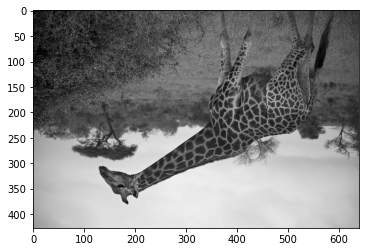

In [31]:
out_img_batch = my_rotate(nd_array_batch, rotate_180)
plt.imshow(out_img_batch[0].asnumpy(), cmap='gray')